# FAKE NEWS DETECTION PROJECT

### Introduction:
The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed.

### About Dataset:
The dataset is in the form of .CSV (Comma Seperated Value) format and consists of **6 columns (5 features and 1 label) with 20800 number of records** as explained below:
- `id`: Unique id for each news article.
- `headline`: It is the title of the news.
- `news`: It contains the full text of the news article.
- `Unnamed0`: It is a serial number.
- `written_by`: It represent the author of the news article.
- `label`: It tells whether the news is fake(1) or not fake(0).

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
#loading dataset into dataframe
df_fake_news = pd.read_csv("train_news.csv")

#interpreting first 5 rows
df_fake_news.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


## Data Analysis

In [3]:
#checking general information of dataset
df_fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


### Remarks:
- There are **20800 records with 6 columns (3 int type and 3 object type)**.
- **Non-Null count shows the presence of null values in the dataset** which needs to be treated accordingly.

In [4]:
#checking null values
df_fake_news.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

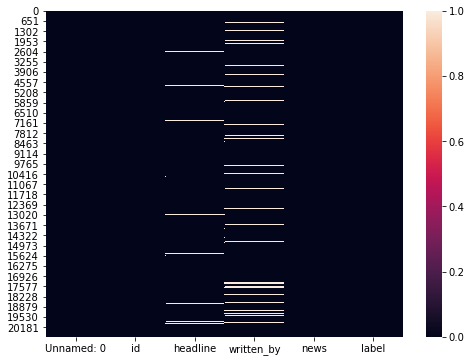

In [5]:
#interpreting null values using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_fake_news.isnull())
plt.show()

#### Remarks:
- From the above interpretion it is clear that the feature `headline`, `written_by` and `news` containes 558, 1957 and 39 null values respectively and needs to be treated accordingly.

#### Checking feature `Unnamed: 0`

In [6]:
#interpreting feature
df_fake_news["Unnamed: 0"]

0            0
1            1
2            2
3            3
4            4
         ...  
20795    20795
20796    20796
20797    20797
20798    20798
20799    20799
Name: Unnamed: 0, Length: 20800, dtype: int64

### Remarks:
- This feature contains continueos data and represents the serial number of record therefore it can be **dropped** from dataset as it is of no use in model training.

#### Checking feature `id`

In [7]:
#interpreting feature
df_fake_news["id"]

0         9653
1        10041
2        19113
3         6868
4         7596
         ...  
20795     5671
20796    14831
20797    18142
20798    12139
20799    15660
Name: id, Length: 20800, dtype: int64

#### Remarks:
- This feature contains continuous data and represents the id of the record, therefore, it can be **dropped** from the dataset as it is of no use in model training.

#### Checking feature `headline`

In [8]:
#interpreting feature
df_fake_news["headline"]

0        Ethics Questions Dogged Agriculture Nominee as...
1        U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2        Cotton to House: ’Do Not Walk the Plank and Vo...
3        Paul LePage, Besieged Maine Governor, Sends Co...
4                             A Digital 9/11 If Trump Wins
                               ...                        
20795                                                  NaN
20796          Albert Pike and the European Migrant Crisis
20797    Dakota Access Caught Infiltrating Protests to ...
20798    How to Stretch the Summer Solstice - The New Y...
20799    Emory University to Pay for ’100 Percent’ of U...
Name: headline, Length: 20800, dtype: object

#### Remarks:
- This feature contains **textual data and is of object type** and needs to be handled accordingly.

#### Checking feature `written_by`

In [9]:
#interpreting feature
df_fake_news["written_by"]

0        Eric Lipton and Steve Eder
1                   David Waldstein
2                           Pam Key
3                      Jess Bidgood
4                 Finian Cunningham
                    ...            
20795                NeverSurrender
20796                 Rixon Stewart
20797                   Eddy Lavine
20798                Alison S. Cohn
20799                  Tom Ciccotta
Name: written_by, Length: 20800, dtype: object

#### Remarks:
- This feature contains **textual data and is of object type** and needs to be handled accordingly.

#### Checking feature `news`

In [10]:
#interpreting feature
df_fake_news["news"]

0        WASHINGTON  —   In Sonny Perdue’s telling, Geo...
1        HOUSTON  —   Venezuela had a plan. It was a ta...
2        Sunday on ABC’s “This Week,” while discussing ...
3        AUGUSTA, Me.  —   The beleaguered Republican g...
4          Finian Cunningham has written extensively on...
                               ...                        
20795    No, you'll be a dog licking of the vomit of yo...
20796    By Rixon Stewart on November 5, 2016 Rixon Ste...
20797    posted by Eddie You know the Dakota Access Pip...
20798    It’s officially summer, and the Society Boutiq...
20799    Emory University in Atlanta, Georgia, has anno...
Name: news, Length: 20800, dtype: object

#### Remarks:
- This feature contains **textual data and is of object type** and needs to be handled accordingly.

#### Checking target `label`

In [11]:
#interpreting target
df_fake_news["label"]

0        0
1        0
2        0
3        0
4        1
        ..
20795    1
20796    1
20797    1
20798    0
20799    0
Name: label, Length: 20800, dtype: int64

#### Remarks:
- The target `label` contains **categorical data which is 0 (not fake) and 1(fake)**.

In [12]:
#checking the ratio of data between label 0 and 1.
label_0 = len(df_fake_news.label[df_fake_news.label == 0])
label_1 = len(df_fake_news.label[df_fake_news.label == 1])
total_record = len(df_fake_news)

print("Total Records for label[0]: ",label_0)
print("% of Records for label[0] : ",round(label_0*100/total_record,2))
print("\n")
print("Total Records for label[1]: ",label_1)
print("% of Records for label[1] : ",round(label_1*100/total_record,2))

Total Records for label[0]:  10387
% of Records for label[0] :  49.94


Total Records for label[1]:  10413
% of Records for label[1] :  50.06


#### Remarks:
- Dataset contains almost equal number of records for label 0 and label 1,therefore, dataset is balanced.

## Data Cleansing

In [13]:
#importing required libraries
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter

#### Dropping columns `Unnamed: 0` and `id`

In [14]:
#dropping columns
cols_to_drop = ['Unnamed: 0','id']

#storing into new dataframe object
df = df_fake_news.drop(columns=cols_to_drop)

#interpreting first 5 rows
df.head()

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


#### Treating Null Values: Replacing null values with ' ' (single space) and merging feature `headline`, `written_by` and `news` to new column `text_feature` and dropping columns `headline`, `written_by` and `news`

In [15]:
#treating null values with ' '
df.fillna(' ',inplace=True)

#Merging feature headline, written_by and news to text_feature
df_news = df.copy()
df_news["text_feature"] = df.headline + " " + df.written_by + " "+ df.news

#dropping feature headline, written_by and news
feature_to_drop = ['headline','written_by','news']
df_news.drop(columns=feature_to_drop,inplace=True)

#interpreting first 5 rows
df_news.head()

,label,text_feature
0,0,Ethics Questions Dogged Agriculture Nominee as...
1,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,0,Cotton to House: ’Do Not Walk the Plank and Vo...
3,0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,1,A Digital 9/11 If Trump Wins Finian Cunningham...


#### Converting `text_feature` to lower case and storing the length of each news to column original_length

In [16]:
#converting to lowercase
df_news["text_feature"] = df_news.text_feature.str.lower()

#storing original news length
df_news["original_length"] = df_news.text_feature.str.len()

#interpreting first 5 rows
df_news.head()

,label,text_feature,original_length
0,0,ethics questions dogged agriculture nominee as...,8048
1,0,u.s. must dig deep to stop argentina’s lionel ...,6201
2,0,cotton to house: ’do not walk the plank and vo...,534
3,0,"paul lepage, besieged maine governor, sends co...",6630
4,1,a digital 9/11 if trump wins finian cunningham...,9211


#### Removing & Replacing certain terms

In [17]:
#Replacing '\n' with white space (' ')
df_news.text_feature = df_news.text_feature.str.replace('\n',' ')

#Keeping only text and number data i.e., a to z, 0 to 9 and words like hasn't, cann't shouldn't etc.
df_news.text_feature = df_news.text_feature.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z'0-9]+")))

In [18]:
#replacing numbers i.e., 0 to 9 with numbr
df_news.text_feature = df_news.text_feature.str.replace("\d+","numbr")

#interpreting random 5 rows to see changes
df_news.sample(5)

<ipython-input-18-d78fda722d08>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_news.text_feature = df_news.text_feature.str.replace("\d+","numbr")


,label,text_feature,original_length
2128,1,black agenda report for week of oct numbr numb...,3536
975,0,china agrees to return seized drone ending sta...,10579
16243,1,america at the crossroads abrogation of democr...,4695
14213,0,cuomo s vision for revamped penn station new h...,5002
20605,1,revealed trump s financial backers paid a play...,1222


#### Getting Most Common Words

In [19]:
#instanciating Counter
def get_common_words(texts):
    cnt = Counter()
    for text in texts:
        for word in text.split():
            cnt[word] += 1
            
    return cnt


In [20]:
#getting most common words of text_feature before removal of stopwords
common_words_with_stopwords = get_common_words(df_news.text_feature)

#interpreting most common words
common_words_with_stopwords.most_common(150)

[('the', 932727),
 ('to', 431811),
 ('of', 422017),
 ('and', 387013),
 ('a', 372143),
 ('in', 315139),
 ('that', 218057),
 ('numbr', 216039),
 ('s', 173025),
 ('is', 158677),
 ('for', 147251),
 ('on', 133190),
 ('it', 125084),
 ('with', 103807),
 ('he', 102464),
 ('was', 102027),
 ('as', 100121),
 ('said', 80135),
 ('by', 79752),
 ('i', 79367),
 ('at', 74678),
 ('are', 74387),
 ('have', 72788),
 ('be', 72291),
 ('his', 69984),
 ('not', 69862),
 ('this', 69831),
 ('from', 69429),
 ('mr', 66328),
 ('they', 65347),
 ('has', 64519),
 ('but', 62489),
 ('an', 61437),
 ('trump', 59628),
 ('you', 58611),
 ('who', 56373),
 ('we', 55869),
 ('had', 45763),
 ('or', 45517),
 ('their', 45435),
 ('about', 42685),
 ('will', 42202),
 ('t', 39632),
 ('she', 39340),
 ('one', 38886),
 ('more', 37709),
 ('would', 37483),
 ('new', 37203),
 ('were', 37191),
 ('been', 37080),
 ('her', 37053),
 ('people', 36645),
 ('what', 34810),
 ('all', 34670),
 ('which', 33822),
 ('if', 33092),
 ('there', 32930),
 ('when',

#### Remarks:
- **In top 150 common words**, *most of the words in the news corpus are stopwords* i.e., the, to, of, and, a, in, that, etc. and therefore, it **needs to be removed.**

#### Removing Stopwords

In [21]:
#initialzing stop words as set
stop_words = set(stopwords.words('english'))
print("Original Stopwords: ",len(stop_words))

#adding custom stop words i.e., a to z, to stop_words set
for ch in range(ord('a'),ord('z')+1):
    stop_words.update(chr(ch))

stop_words.update(['could','would','us','also','mr','ms','mrs','among','put'])
print(stop_words)
print("Total Stopwords: ",len(stop_words))

Original Stopwords:  179
{'won', 'up', "you're", 'had', 'j', 'after', 'herself', "mightn't", 'an', 'again', 'll', 'these', 'through', 'c', 'now', 'his', 'into', "hadn't", 'no', 'but', 'this', 'h', 'where', 'yourselves', 'very', 'weren', 'here', 'not', 'also', 'against', 'is', 'hers', 'they', 'that', 'will', 'doesn', 'only', 'below', "that'll", 'about', "she's", 'for', 'doing', 'our', 'needn', 'you', 'before', 'than', 'o', 'itself', 'b', 'above', 've', 'ms', "it's", 'on', 'same', 'from', 'at', "wasn't", 'be', 'ma', "weren't", 'isn', 'themselves', 'all', 'l', 'until', 'w', 'z', 'whom', 'do', 'put', 'or', 'off', 'over', 'such', "don't", "hasn't", 'shan', 'ours', 'ain', 'any', 're', 'were', 'f', 'the', 'out', 'when', "doesn't", 'nor', 'both', 'their', 'further', 'how', 's', 'some', 'why', "didn't", 'been', 'just', 'would', 'those', 'r', 'while', 'each', 'e', 'its', 'a', 'u', 'during', 'aren', 'mightn', "shouldn't", 'who', 'with', 'between', 'we', 'myself', 'what', 'was', 'most', 'other', '

In [22]:
#removing stopwords
df_news.text_feature = df_news.text_feature.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [23]:
#interpreting random 5 rows to see the change
df_news.sample(5)

,label,text_feature,original_length
14747,1,teacher numbr yr old 'i can't wait trump elect...,4905
10140,1,even sing anthem singer kneels performance alt...,1272
1953,0,george michael wrestled fame frank sinatra adv...,2834
18004,1,cry help texas homeschooled children continue ...,19598
15800,0,dalian wanda china offers carrot hollywood new...,9073


#### Removing Punctuations & Storing length of text after cleansing in column new_length

In [24]:
#removing punctuations
df_news.text_feature = df_news.text_feature.str.replace("[^\w\d\s]","")

#storing length of each text in column new_length
df_news["new_length"] = df_news.text_feature.str.len()

#interpreting random 10 rows to see the change
df_news.sample(10)

<ipython-input-24-b561d2a8df49>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_news.text_feature = df_news.text_feature.str.replace("[^\w\d\s]","")


,label,text_feature,original_length,new_length
14776,0,republican study committee joins gop house lea...,3823,2576
105,0,orlando donald trump net neutrality tuesday ev...,4616,3144
6480,1,trump adviser says israeli settlements illegal...,3775,2789
17183,1,russia quietly winning middle east nobody talk...,4517,3010
11554,0,amid party concerns donald trump meets finance...,2403,1714
11673,1,envy israel shamir heres something interesting...,4998,3051
3267,1,fox news calls special prosecutor investigate ...,4060,2510
17650,0,donald trump republican party marijuana wednes...,5267,3689
5477,1,putin trump phone view better relations progre...,2528,1655
8108,0,dave brat numbrb americans first john binder r...,4205,2996


In [25]:
#checking total length of text cleaned
original_length_total = df_news.original_length.sum()
new_length_total = df_news.new_length.sum()
length_cleaned = original_length_total - new_length_total

print("Total Original Text Length:",original_length_total)
print("Total New Text Length     :",new_length_total)
print("Length Cleaned:           :",length_cleaned)
print(f"% of Length Cleaned       : {round(length_cleaned*100/original_length_total,2)}%")

Total Original Text Length: 96356778
Total New Text Length     : 65477473
Length Cleaned:           : 30879305
% of Length Cleaned       : 32.05%


In [26]:
#check most common words after removal of stopwords & punctuations
common_words_without_stopwords = get_common_words(df_news.text_feature)

#interpreting top 150 most common words
common_words_without_stopwords.most_common(150)

[('numbr', 216096),
 ('said', 80135),
 ('trump', 59632),
 ('one', 38886),
 ('new', 37227),
 ('people', 36645),
 ('clinton', 28302),
 ('like', 26534),
 ('president', 25679),
 ('time', 21311),
 ('state', 20728),
 ('many', 19310),
 ('even', 19026),
 ('years', 18085),
 ('states', 17763),
 ('two', 17615),
 ('first', 17591),
 ('government', 16889),
 ('american', 16318),
 ('world', 16261),
 ('times', 16160),
 ('hillary', 15999),
 ('news', 15715),
 ('year', 15685),
 ('obama', 15428),
 ('last', 15300),
 ('united', 15133),
 ('york', 15052),
 ('get', 13828),
 ('may', 13524),
 ('campaign', 13310),
 ('election', 13301),
 ('country', 12851),
 ('make', 12537),
 ('going', 12507),
 ('way', 12430),
 ('house', 12410),
 ('made', 12152),
 ('white', 12145),
 ('media', 12006),
 ('back', 11998),
 ('know', 11942),
 ('much', 11767),
 ('think', 11695),
 ('day', 11656),
 ('war', 11502),
 ('say', 11195),
 ('political', 11184),
 ('donald', 11035),
 ('see', 10947),
 ('well', 10828),
 ('russia', 10778),
 ('national',

#### Remarks:
- After removal of stopwords and punctuations, most common words becomes numbr, said, trump, etc.

## Exploratory Data Analysis (EDA)

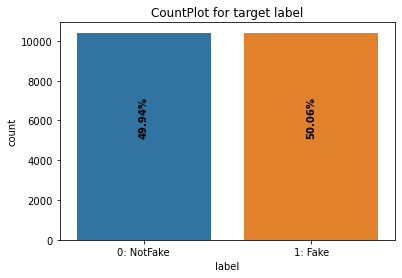

In [27]:
#checking target label using count plot
ax = sns.countplot(x="label",data=df_news)
k=0
for i in ax.patches:
    plt.text(k,i.get_height()/2,f"{round(i.get_height()*100/len(df_news.label),2)}%",ha="center",rotation=90,fontweight="bold")
    k += 1
    
ax.set_xticklabels(['0: NotFake','1: Fake'])
plt.title("CountPlot for target label")
plt.show()

#### Remarks:
- There are almost equal number of records available for fake (1) and Not Fake (0) label.
- **Dataset is balanced.**

#### Checking the news text length distribution before and after cleansing

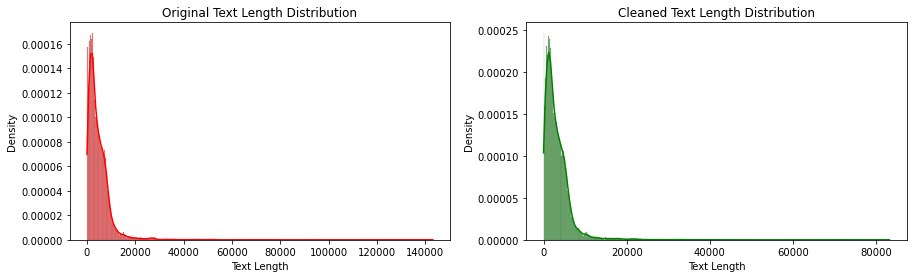

In [28]:
#checking the text length distribution using column original_length and new_length
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,4))

#for original_length
sns.histplot(df_news.original_length,ax=ax1,color="red",stat="density",kde=True)
ax1.set_title("Original Text Length Distribution")
ax1.set_xlabel("Text Length")

#for new_length
sns.histplot(df_news.new_length,ax=ax2,color="green",stat="density",kde=True)
ax2.set_title("Cleaned Text Length Distribution")
ax2.set_xlabel("Text Length")

plt.show()

#### Remarks:
- From the above dipiction, it is clear that the **length of text reduced by greater amount** after cleansing of text data.
- Also, the range of **text length reduced from 0-140000 to 0-80000**.

#### Checking the 50 most common words before cleansing and after cleansing

In [29]:
#creating most common words dataframe
#before cleansing
df_cw_bc = pd.DataFrame(common_words_with_stopwords.most_common(),columns=['words','count'])

#after cleansing
df_cw_ac = pd.DataFrame(common_words_without_stopwords.most_common(),columns=['words','count'])

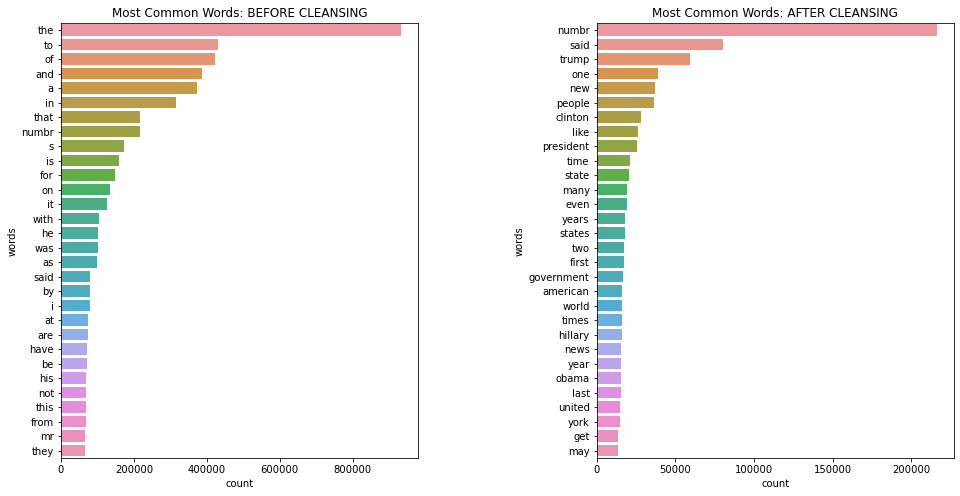

In [30]:
#Checking the 30 most common words before and after cleansing using barplot
max_words = 30
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
fig.subplots_adjust(wspace=0.5)
#before cleansing
sns.barplot(x='count',y='words',data=df_cw_bc[:max_words],ax=ax1)
ax1.set_title("Most Common Words: BEFORE CLEANSING")

#after cleansing
sns.barplot(x='count',y='words',data=df_cw_ac[:max_words],ax=ax2)
ax2.set_title("Most Common Words: AFTER CLEANSING")

plt.show()

#### Remarks:
- From above dipiction, it is clear that the most common words before cleansing were the, to, of, and, a, etc. while after cleansing most common words are numbr, trump, one, new, people, etc.

### WordCloud: Getting sense of loud words

In [31]:
#importing required libraries
from wordcloud import WordCloud

In [32]:
#getting wordcloud for fake news i.e. label = 1
word_cloud_1 = WordCloud(width=500,height=500,background_color="white",max_words=80).generate(' '.join(df_news.text_feature[df_news.label==1]))

#getting wordcloud for not fake news i.e. label = 0
word_cloud_0 = WordCloud(width=500,height=500,background_color="white",max_words=80).generate(' '.join(df_news.text_feature[df_news.label==0]))


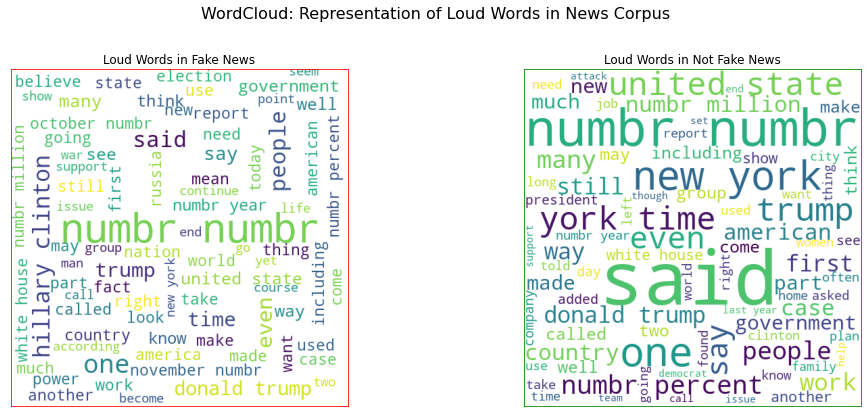

In [33]:
#displaying wordcloud using matplotlib
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
fig.subplots_adjust(wspace=0.3)
fig.suptitle("WordCloud: Representation of Loud Words in News Corpus",fontsize=16)

#displaying wordcloud for label = 1
ax1.imshow(word_cloud_1)
ax1.set_title("Loud Words in Fake News")
for spine in ax1.spines.values():
    spine.set_edgecolor("red")

ax1.set_xticks([])
ax1.set_yticks([])
#displaying wordcloud for label = 0
ax2.imshow(word_cloud_0)
ax2.set_title("Loud Words in Not Fake News")
for spine in ax2.spines.values():
    spine.set_edgecolor("green")

ax2.set_xticks([])
ax2.set_yticks([])

fig.tight_layout(pad=2)
plt.show()

#### Remarks:
- Loud words in Fake news are numbers, hillary clinton, donald trump, america, united state, people, war, etc.
- Loud words in Not Fake news are new york, trump, united state, support, help, democrat etc.

### EDA Concluding Remarks:
>Starting with **count plot**, it was found that dataset is balanced with almost equal number of records for fake news as well as not fake news. Moving further with **distribution plot** for news text length, it was found that after cleansing of news text, the length of news text reduced by a greater amount. Also with the help of **barplot** for most common words, it was found that, before cleansing, the most common words are mostly stop words i.e. the, and, of, a, etc. and after cleansing, the most common words are like, numbr, said, clinton, people, president, time, state etc. With the help of word cloud, it was found that the loud words in fake news are hillary clinton, donald trump, america, united state, war etc. while in not fake news are new york, trump, united state, support, help, demorat etc.

## Preparing Data for Model Training & Testing

In [34]:
#importing required libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import tqdm.notebook as tqdm
import sys, timeit
from IPython.display import display

### 1. Convert text to vectors

In [40]:
#convert news text to vectors using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=8000)
features = tfidf.fit_transform(df_news.text_feature).toarray()

### 2. Seperating Input and Output Variables

In [41]:
#Input variable
X = features
print("Feature's Shape: ",X.shape)

#Output variable
Y = df_news.label
print("Target's Shape: ",Y.shape)

Feature's Shape:  (20800, 8000)
Target's Shape:  (20800,)


### 3. Training & Testing Model

In [42]:
#function to get best random state
def get_best_random_state(model,X,Y,t_size=0.25,rs_range=range(1,301,50)):
    best_rstate = 0
    best_accuracy_score = 0
    random_state_message = "\r"
    
    for i in tqdm.tqdm(rs_range,desc=f"Best_Random_State => {model}"):
        X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=t_size,random_state=i)
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        a_score = accuracy_score(Y_test,y_pred)
        
        if a_score > best_accuracy_score:
            best_accuracy_score = a_score
            best_rstate = i
            
        random_state_message += f"[{i}: {round(a_score*100,2)}]<--->"
        sys.stdout.write(random_state_message)
        
    sys.stdout.write(f"\n\nBest Random State: {best_rstate} found with Accuracy: {best_accuracy_score}")
    return best_rstate, best_accuracy_score
#End of function


#function to get best cv score
def get_best_cv(model,X_train,Y_train,parameters,cv_range=range(5,25,5)):
    best_cv_score = 0
    best_cv = 0
    
    cv_message = "\r"
    for i in tqdm.tqdm(cv_range,desc=f"Best_CV => {model}"):
        gscv = GridSearchCV(model,parameters)
        gscv.fit(X_train,Y_train)
        
        cv_score = cross_val_score(gscv.best_estimator_,X_train,Y_train,cv=i).mean()
        
        if cv_score > best_cv_score:
            best_cv_score = cv_score
            best_cv = i
        
        cv_message += f"[{i}:{round(cv_score*100,2)}]<--->"
        sys.stdout.write(cv_message)
    
    sys.stdout.write(f"\n\nBest CV: {best_cv} found with Cross Val Score: {best_cv_score}")
    
    return best_cv, best_cv_score
#End of function

#function to build models
def build_models(models,X,Y,t_size=0.25,rs_range=range(1,301,50),cv_range=range(5,25,5)):
    for i in tqdm.tqdm(models,desc="Building Models"):
        sys.stdout.write("\n=======================================================================================\n")
        sys.stdout.write(f"Current Model in Progress: {i} ")
        sys.stdout.write("\n=======================================================================================\n")
        
        #start time
        start_time = timeit.default_timer()
        
        #Find the best random state
        best_random_state, best_accuracy_score = get_best_random_state(models[i]['name'],X,Y,t_size,rs_range)
        sys.stdout.write("\n")
        
        #Spliting train and test data using train_test_split method with best random state value
        X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=t_size,random_state=best_random_state)
        
        #Find the best CV
        best_cv, best_cv_score = get_best_cv(models[i]['name'],X_train,Y_train,models[i]['parameters'],cv_range)
        sys.stdout.write("\n\nBuilding Model...")
        
        #Training the model using best CV
        gscv = GridSearchCV(models[i]['name'],models[i]['parameters'],cv=best_cv)
        gscv.fit(X_train,Y_train)
        
        #Testing model
        y_pred = gscv.best_estimator_.predict(X_test)
        
        #Recording model performance
        model_accuracy_score = accuracy_score(Y_test,y_pred)
        model_classification_report = classification_report(Y_test,y_pred)
        model_log_loss = log_loss(Y_test,y_pred)
        
        #end time
        end_time = timeit.default_timer()
        sys.stdout.write(f"Completed in [{end_time-start_time} sec.]")
        
        #storing model specifications
        models[i]['initial_accuracy_score'] = best_accuracy_score
        models[i]['best_random_state'] = best_random_state
        models[i]['x_train'] = X_train
        models[i]['x_test'] = X_test
        models[i]['y_train'] = Y_train
        models[i]['y_test'] = Y_test
        models[i]['best_cv'] = best_cv
        models[i]['best_cv_score'] = best_cv_score
        models[i]['gscv'] = gscv
        models[i]['y_predict'] = y_pred
        models[i]['final_accuracy'] = model_accuracy_score
        models[i]['log_loss'] = model_log_loss
        models[i]['classification_report'] = model_classification_report
        models[i]['build_time'] = f"{end_time - start_time} (in sec.)"
        
        sys.stdout.write("\n=======================================================================================\n\n\n")
    
    return models
#End of function

#function to display model performance
def display_performance(models):
    model_names = []
    model_initial_score = []
    model_cross_val_score = []
    model_log_loss_score = []
    model_final_score = []
    model_build_time = []
    for i in models:
        model_names.append(i)
        model_initial_score.append(models[i]['initial_accuracy_score'])
        model_cross_val_score.append(models[i]['best_cv_score'])
        model_log_loss_score.append(models[i]['log_loss'])
        model_final_score.append(models[i]['final_accuracy'])
        model_build_time.append(models[i]['build_time'])
    
    model_df = pd.DataFrame({
        "Name": model_names,
        "Initial Score": model_initial_score,
        "Cross Val Score": model_cross_val_score,
        "Log Loss": model_log_loss_score,
        "Final Score": model_final_score,
        "Build Time": model_build_time,
    })
    
    model_df['Difference (Final Score - Cross Val Score)'] = model_df['Final Score'] - model_df['Cross Val Score']
    display(model_df)
    
    for i in models:
        print("========================================================")
        print(f"for model: {i}")
        print("========================================================")
        print("CLASSIFICATION REPORT")
        print(models[i]['classification_report'])
        print("=======================================================\n\n")
        
    return
#End of function

In [43]:
#List of models for training & testing
models = {
    "MultinomialNB":{
        "name": MultinomialNB(),
        "parameters":{
            "alpha": [1.0]                
        }
    },
    "SGDClassifier":{
        "name": SGDClassifier(),
        "parameters":{
            "loss":['hinge','modified_huber'],
            "alpha":[0.001,0.0001,0.00001],
            "n_jobs":[-1],
            "learning_rate":['optimal'],
            "max_iter":[100]
        }
    },
    "HistGradientBoostingClassifier":{
        "name": HistGradientBoostingClassifier(),
        "parameters":{
            "loss": ['binary_crossentropy'],
            "l2_regularization": [0,1.0]
        }
    }
}

In [44]:
#building models
build_model = build_models(models,X,Y,rs_range=[38,40,42,44],cv_range=[5,7,9])

Building Models:   0%|          | 0/3 [00:00<?, ?it/s]


Current Model in Progress: MultinomialNB 


Best_Random_State => MultinomialNB():   0%|          | 0/4 [00:00<?, ?it/s]

[38: 89.94]<--->[40: 90.81]<--->[42: 90.4]<--->[44: 90.15]<--->

Best Random State: 40 found with Accuracy: 0.9080769230769231


Best_CV => MultinomialNB():   0%|          | 0/3 [00:00<?, ?it/s]

[5:90.06]<--->[7:89.99]<--->[9:90.07]<--->

Best CV: 9 found with Cross Val Score: 0.9007059959405734

Building Model...Completed in [105.37263130000065 sec.]



Current Model in Progress: SGDClassifier 


Best_Random_State => SGDClassifier():   0%|          | 0/4 [00:00<?, ?it/s]

[38: 96.69]<--->[40: 96.73]<--->[42: 97.08]<--->[44: 96.56]<--->

Best Random State: 42 found with Accuracy: 0.9707692307692307


Best_CV => SGDClassifier():   0%|          | 0/3 [00:00<?, ?it/s]

[5:95.94]<--->[7:96.53]<--->[9:96.54]<--->

Best CV: 9 found with Cross Val Score: 0.9653841321479695

Building Model...Completed in [1180.5848260999992 sec.]



Current Model in Progress: HistGradientBoostingClassifier 


Best_Random_State => HistGradientBoostingClassifier():   0%|          | 0/4 [00:00<?, ?it/s]

[38: 97.92]<--->[40: 98.12]<--->[42: 97.85]<--->[44: 97.75]<--->

Best Random State: 40 found with Accuracy: 0.9811538461538462


Best_CV => HistGradientBoostingClassifier():   0%|          | 0/3 [00:00<?, ?it/s]

[5:97.69]<--->[7:97.67]<--->[9:97.62]<--->

Best CV: 5 found with Cross Val Score: 0.976923076923077

Building Model...Completed in [27015.6240779 sec.]




In [47]:
#displaying model performances
display_performance(build_model)

,Name,Initial Score,Cross Val Score,Log Loss,Final Score,Build Time,Difference (Final Score - Cross Val Score)
0,MultinomialNB,0.908077,0.900706,3.174932,0.908077,105.37263130000065 (in sec.),0.007371
1,SGDClassifier,0.970769,0.965384,1.135799,0.967115,1180.5848260999992 (in sec.),0.001731
2,HistGradientBoostingClassifier,0.981154,0.976923,0.677499,0.980385,27015.6240779 (in sec.),0.003462


for model: MultinomialNB
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2575
           1       0.94      0.87      0.91      2625

    accuracy                           0.91      5200
   macro avg       0.91      0.91      0.91      5200
weighted avg       0.91      0.91      0.91      5200



for model: SGDClassifier
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2585
           1       0.99      0.95      0.97      2615

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200



for model: HistGradientBoostingClassifier
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2575
           1       0.98      0.98      0.98      2625

    accuracy        

#### Remarks:
> From the above model comparision it is clear that **HistGradientBoostingClassifier** performs better with **Accuracy Score: 98.03% and Log Loss: 0.67** than other models. Therefore, proceeding with **HistGradientBoostingClassifier**.

## Model Saving or Serialization

In [49]:
import joblib
#selecting best model
best_model = build_model['HistGradientBoostingClassifier']['gscv']

#saving model
joblib.dump(best_model.best_estimator_,open('fake_news_detection.obj','wb'))

## Data Pre-processing Done
The following pre-processing pipeline is required to perform model prediction:
1. Load dataset.
2. Drop column Unnamed: 0 and id.
3. Treating Null Values: Replace null values with ' ' (single space) and merging feature headline, written_by and news to new column text_feature and then dropp columns headline, written_by and news.
4. Convert text_feature to lower case and replace '\n' with single space.
5. Keep only text data i.e., a-z’ and 0-9 and remove other data from text_feature.
6. Remove stop words and punctuations.
7. Covert text_feature to vectors using TfidfVectorizer.
8. Load the serialized model.
9. Predict values by passing the vectors of text_feature.

### Final Remarks:
>During the data analysis, I have replaced the null values with single white space and then merge the feature headline, news, written_by to make a single feature text_feature and then dropped the feature headline, news and written_by. But these null values can also be removed by dropping the entire row and proceed further without merging the features into single feature which might impact the model performance either in positive or negative way. As of now, I am finishing this project with my current approach which gives the **final accuracy score of 98.03% and log loss: 0.67** and this can be further improved by training with more specific data

### ____EOF____